## Covid Information

In [28]:
import importlib.util
import sys

# Name of package
packages = ['covid', 'termcolor']

for name in packages:

    if name in sys.modules:
        print(f"{name!r} already in sys.modules")

    elif (spec := importlib.util.find_spec(name)) is not None:
        module = importlib.util.module_from_spec(spec)
        sys.modules[name] = module
        spec.loader.exec_module(module)
        print(f"{name!r} has been imported")

    else:
        print(f"can't find the {name!r} module")

!{sys.executable} -m pip install termcolor # Must put the name of the package without semicolon

'covid' already in sys.modules
can't find the 'termcolor' module
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=82ed078b995de61db0797e70a634175f504a229959085c6b600d9b3f367a7e9a
  Stored in directory: /home/laurentiu/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor


In [33]:
# Import necessary libraries
from termcolor import colored
import matplotlib.pyplot as plt
import numpy as np
import covid

covid = covid.Covid()

In [39]:
"""
Comprove if a string is an integer.
@params:
    - s: string to comprove
    - return: True if it is an integer, False otherwise
"""

def intString(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False
    
"""
Given a sample number by the user, plot the data of the first N samples.
@params:
    - cov: data which contains all the information we need related to covid.
    - max_samples: max number of samples allowed to be plotted.
"""
    
def number_of_samples(cov, max_samples):
    
    N = -1
    
    while N < 1 or N > max_samples:
        
        print('Number of samples [max', max_samples, 'samples]:')
        
        inp = input()
        
        if intString(inp):
            N = int(inp)
            if N > max_samples or N < 1:
                print(colored('\nPlease write a positive number smaller than ' + str(max_samples) + '.', 'red'))
                
        else:
            print(colored('\nPlease write a positive number smaller than' + str(max_samples) + '.', 'red'))

    cov = cov[:N]
    X = np.arange(0, N*2, 2)

    # It's not the most efficient way to collect the data, but as we have a small data sample it will not take long
    countries = [data['country'] for data in cov]
    confirmed = [data['confirmed'] for data in cov]
    active = [data['active'] for data in cov]
    recovered = [data['recovered'] for data in cov]
    deaths = [data['deaths'] for data in cov]
    
    recovered[recovered==None] = 0
    
    
    # Plot
    fig = plt.figure(figsize=(13,13))
    ax = fig.add_axes([1,1,1,1])

    conf = ax.bar(X, confirmed, color='blueviolet', width=0.2, label='Confirmed')
    actv = ax.bar(X + 0.2, active, color='darkorange', width=0.2, label='Active')
    recv = ax.bar(X + 0.4, recovered, color='limegreen', width=0.2, label='Recovered')
    dths = ax.bar(X + 0.6, deaths, color='crimson', width=0.2, label='Deaths')

    # In how many fractions do we want to split the y-axis
    step = 10 * len(str(confirmed[0]))

    plt.xticks(X, countries)
    
    def y_axis(n, step):
    
        aux = str(n)[0]
        for i in range(len(str(n))-1):
            aux += '0'

        jump = int(aux)//step

        return [i for i in range(0,n,jump)]

    plt.yticks(y_axis(confirmed[0], 5))
    plt.legend(handles=[conf, actv, recv, dths])

    plt.plot()
    
"""
Give the information for only one Country in a Pie Plot.
@params:
    - country: country from which to search the data and plot it.
    - cov: data which contains all the information we need related to covid.
"""
    
    
def country_covid(country, cov):
    
    index = countries.index(country)
    
    country_data = {}
    
    for data in cov:
        if data['country']==country:
            country_data['confirmed'] = data['confirmed']
            country_data['recovered'] = data['recovered']
            country_data['active'] = data['active']
            country_data['deaths'] = data['deaths']
            
    if country_data['recovered'] == None:
        country_data['recovered'] = 0
            
    if country_data['active'] > country_data['recovered']:

        labels = ['Confirmed', 'Recovered', 'Active', 'Deaths']
        explode = [0.05, 0.05, 0.05, 0.1]
        colors = ['blueviolet', 'limegreen','darkorange', 'crimson']
        
        data = [country_data['confirmed'], country_data['recovered'], 
                country_data['active'], country_data['deaths']]
        
    else:

        labels = ['Confirmed', 'Active', 'Recovered', 'Deaths']
        explode = [0.05, 0.05, 0.05, 0.1]
        colors = ['blueviolet', 'darkorange', 'limegreen', 'crimson']
        
        data = [country_data['confirmed'], country_data['active'], 
                country_data['recovered'], country_data['deaths']]

    pie = plt.pie(data, explode=explode, labels=labels, colors=colors, shadow=True)
    plt.axis('equal')
    plt.title(country, fontsize=14, pad=30)
    plt.legend(data, title='Inhabitants', loc='center left', prop={'size': 10}, bbox_to_anchor=(1, 0, 1.5, 2))
    plt.rcParams['legend.title_fontsize'] = 'medium'
    
    plt.show()
      

Name of country (Press Enter to see a number of samples):
Number of samples [max 15 samples]:
13


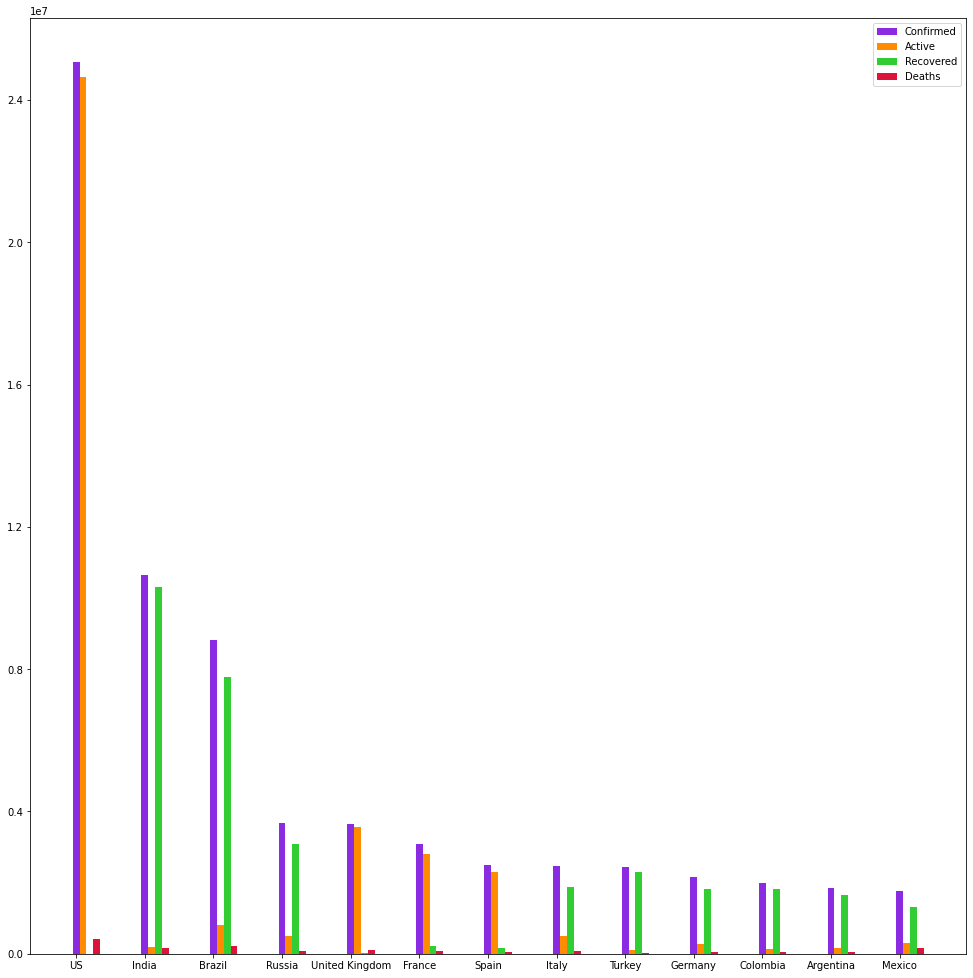

In [42]:


# covid.get_data()
"""
    {'id'
     'country'
     'confirmed'
     'active'
     'deaths'
     'recovered'
     'latitude'
     'longitude'
     'last_update'}
"""

cov = sorted(covid.get_data(), key=lambda k: k['confirmed'], reverse=True)

countries = [data['country'][:12] for data in cov]

# Get data for a specific country or number of samples
order = 0

while order == 0:
    
    inp = input('Name of country (Press Enter to see a number of samples):')
    
    if inp=='':
        order = 1
    
    else:
        country = [c for c in countries if c.lower()==inp.lower()]
        if len(country) == 1:
            print('Finding Results...\n')
            order = 2
            country = country[0]
        else:
            print(colored('There is no country named ' + inp + ' in our database.', 'red'))

# Number of samples
if order == 1:
    number_of_samples(cov, max_samples=15)

elif order == 2:
    country_covid(country, cov)

    